#   第3回 回帰その1: 基礎的事項

いつものように右上の「Remix」ボタンを押して自分用の複製を作成すれば、各セルを「Shift+Enter」で実行しながら読むことができます

必要なパッケージを読み込みます

In [1]:
using Plots, CSV, Statistics, LinearAlgebra

# 1変数の回帰 (単回帰)

切片1で傾き2にノイズを加えたラベルありデータ$\{y_n, x_n\}_{n=1}^{N}$を$N=100$点つくってプロットします

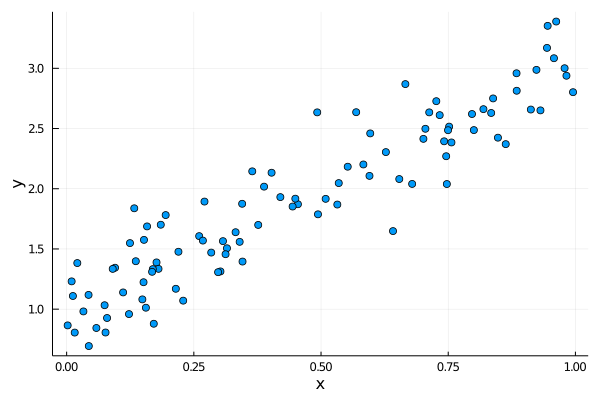

In [1]:
N = 100
x = rand(N) # rand関数を0から1の一様乱数に従った入力xをN点つくる

#配列の要素それぞれについて演算する場合はドット.を付ける
#randnは平均ゼロ、分散1の正規分布に従った乱数を作る関数
y = 1.0 .+ 2.0 .* x .+ 0.3 .* randn(N)

scatter(x, y, xlabel="x", ylabel="y", legend=false)

単回帰を以下のように解くための関数を定義しましょう

$$
\hat{\bm{w}} = \arg \min\ L(\bm{y},\bm{x} | \bm{w}) = \frac{1}{2} \sum_{n=1}^{N} (y_n - w_0 - w_1 x_n)^2
$$
$$
\hat{w}_1 = \frac{\sum_{n=1}^{N}(x_n - \bar{x})(y_n - \bar{y})}{\sum_{n=1}^{N}(x_n - \bar{x})^2}
$$
$$
\hat{w}_0 = \bar{y} - \hat{w}_1 \bar{x}
$$
$$
\bar{y} = \frac{1}{N}\sum_{n=1}^{N} y_n
$$
$$
\bar{x} = \frac{1}{N}\sum_{n=1}^{N} x_n
$$


In [1]:
function solve_linear_regression(x, y)
  x_mean = mean(x) # meanは算術平均を求める関数
  y_mean = mean(y)
  w_1 = sum((x .- x_mean) .* (y .- y_mean)) / sum((x .- x_mean).^2) #sumは和をとる関数
  w_0 = y_mean - w_1 * x_mean
  return w_0, w_1
end

solve_linear_regression

それでは、先ほどのデータを使って単回帰を行ってみましょう。悪くない結果ですね

In [1]:
w_0, w_1 = solve_linear_regression(x, y)

(0.981166, 2.04889)

回帰の結果をデータに重ねてプロットしてみて、目で確認しましょう

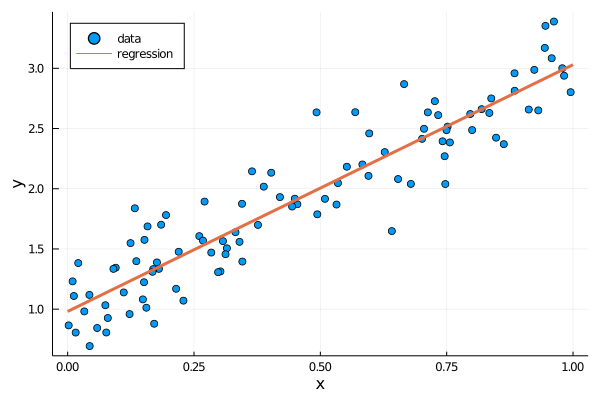

In [1]:
x_grid = range(0.0, stop=1.0, length=100)
y_hat = w_0 .+ w_1 .* x_grid

scatter(x, y, xlabel="x", ylabel="y", label="data")
plot!(x_grid, y_hat, lw=3, label="regression", legend=:topleft)  #regressionは回帰の意味


# 多変数の回帰 (重回帰)

$x_1$と$x_2$の2つの入力があり、切片1でそれぞれ傾き2と-2にノイズを加えたラベルありデータ$\{y_n, \bm{x}_n\}_{n=1}^{N}$を$N=100$点つくってプロットします

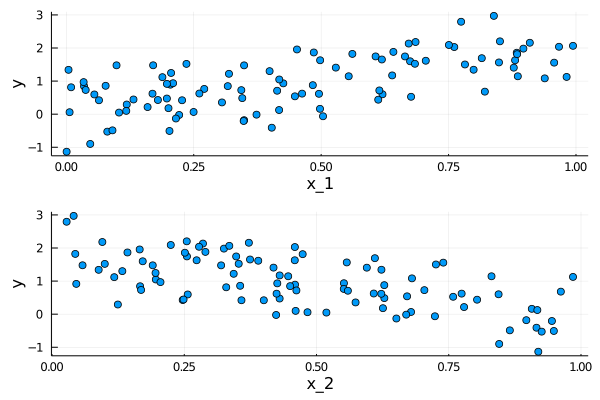

In [1]:
N = 100
x_1 = rand(N)
x_2 = rand(N)
y = 1.0 .+ 2.0 .* x_1 - 2.0 .* x_2 .+ 0.3 .* randn(N)

p1 = scatter(x_1, y, xlabel="x_1", ylabel="y", legend=false)
p2 = scatter(x_2, y, xlabel="x_2", ylabel="y", legend=false)
plot(p1, p2, layout=(2, 1), legend=false)

重回帰を以下のように解くための関数を定義しましょう

$$
\hat{\bm{w}}=\arg \min \ L(\bm{w}) = \frac{1}{2} \sum_{n=1}^{N} (y_n - w_0 - \sum_{i=1}^{p} w_i x_{n,i})^2 = \| \bm{y} - X \bm{w} \ \|
$$
$$
\hat{\bm{w}} = (X^T X)^{-1} X^T y
$$


In [1]:
function solve_multiple_regression(X, y)
  # X'はXの転置をとります。inv関数は逆行列を計算します
  # 本当の実装では、pinv関数や特異値分解(SVD)を用いるほうが安定に計算できます
  w = inv(X' * X) * X' * y
  return w
end

solve_multiple_regression

それでは、先ほどのデータを使って重回帰を行ってみましょう。先ほどと同様に悪くない結果ですね

In [1]:
X = ones(N, 3)
X[:, 2] .= x_1
X[:, 3] .= x_2

w = solve_multiple_regression(X, y)

3-element Array{Float64,1}:
  1.09163
  1.86706
 -2.05144

回帰の結果をデータに重ねてプロットしてみて、目で確認しましょう

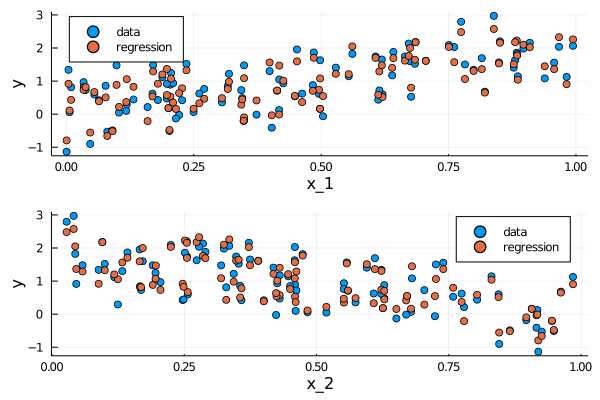

In [1]:
y_hat = w[1] .+ w[2] .* x_1 .+ w[3] .* x_2

p1 = scatter(x_1, y, xlabel="x_1", ylabel="y", label="data")
scatter!(x_1, y_hat, label="regression", legend=:topleft) #regressionは回帰の意味
p2 = scatter(x_2, y, xlabel="x_2", ylabel="y", label="data")
scatter!(x_2, y_hat, label="regression", legend=:topright)
  plot(p1, p2, layout=(2, 1))

# やってみよう：boston housing への応用

先週のnotebookで紹介したboston housingデータへ重回帰を応用してみましょう。住宅価格(MEDV)と最も関連している説明変数は何でしょうか？途中までヒントを出しますのでやってみましょう。

授業で軽く説明しましたが、回帰の傾きのパラメータと、変数間の相関係数は関連しています。

[boston.csv](https://nextjournal.com/data/QmWXcYso6G9WxJMjF38E3gNshXYrD1FnNueQa7AyWGnn2f?content-type=text/csv&node-id=862e31c0-bf1a-4768-9202-a4f959920a2a&filename=boston.csv&node-kind=file)

データを読み込んで出力(目的変数)yへ住宅価格(MEDV)、説明変数へ1〜13列目を代入します

In [1]:
boston = CSV.read("/.nextjournal/data-named/QmWXcYso6G9WxJMjF38E3gNshXYrD1FnNueQa7AyWGnn2f/boston.csv")

もう一度各列の意味を確認します

 1. CRIM 地域ごとの一人当たりの犯罪率 (町ごとの一人あたり) (説明変数)
 2. ZN 25,000 平方フィート以上の住宅区画の割合 (説明変数)
 3. INDUS	小売業以外の商業が占める土地面積の割合 (説明変数)
 4. CHAS チャールズ川沿いかどうかの変数（川沿い1、それ以外0、説明変数）
 5. NOX 一酸化窒素濃度（ppgm単位、説明変数）
 6. RM 1戸あたりの部屋数 (説明変数)
 7. AGE 1940年以前に建設された物件の割合 (説明変数)
 8. DIS 地域から5つの雇用施設までの重み付き距離 (説明変数)
 9. RAD 高速道路へのアクセスしやすさ (説明変数)
10. TAX 10,000ドルあたりの固定資産税の割合 (説明変数)
11. PTRATIO 生徒と教師の比率 (説明変数)
12. B	地域における黒人の割合 (説明変数)
13. LSTAT	地域における低所得者の割合 (説明変数) 
14. MEDV 住宅価格の中央地 (1000ドル単位) **(目的変数)**

In [1]:
#作成した関数で計算できるように64ビット浮動小数点Float64のVector型(=1次元Array型)へ変換する
y = Vector{Float64}(boston.MEDV)
#作成した関数で計算できるように64ビット浮動小数点Float64のMatrfix型(=2次元Array型)へ変換する
x = Matrix{Float64}(boston[:, 1:13])

506×13 Array{Float64,2}:
 0.00632  18.0   2.31  0.0  0.538  6.575  …  1.0  296.0  15.3  396.9    4.98
 0.02731   0.0   7.07  0.0  0.469  6.421     2.0  242.0  17.8  396.9    9.14
 0.02729   0.0   7.07  0.0  0.469  7.185     2.0  242.0  17.8  392.83   4.03
 0.03237   0.0   2.18  0.0  0.458  6.998     3.0  222.0  18.7  394.63   2.94
 0.06905   0.0   2.18  0.0  0.458  7.147     3.0  222.0  18.7  396.9    5.33
 0.02985   0.0   2.18  0.0  0.458  6.43   …  3.0  222.0  18.7  394.12   5.21
 0.08829  12.5   7.87  0.0  0.524  6.012     5.0  311.0  15.2  395.6   12.43
 0.14455  12.5   7.87  0.0  0.524  6.172     5.0  311.0  15.2  396.9   19.15
 0.21124  12.5   7.87  0.0  0.524  5.631     5.0  311.0  15.2  386.63  29.93
 0.17004  12.5   7.87  0.0  0.524  6.004     5.0  311.0  15.2  386.71  17.1
 ⋮                                 ⋮      ⋱               ⋮            
 0.26838   0.0   9.69  0.0  0.585  5.794     6.0  391.0  19.2  396.9   14.1
 0.23912   0.0   9.69  0.0  0.585  6.019     6.0  391.0  1

In [1]:
N = length(y)
X = ones(N, 14)
X[:, 2:14] .= x

# ここでsolve_multiple_regression()を呼び出してwを求める
w = solve_multiple_regression(X, y)

# wを整理してプリント
for p = 1:14
  println("w_$(p-1): $(w[p])")
end

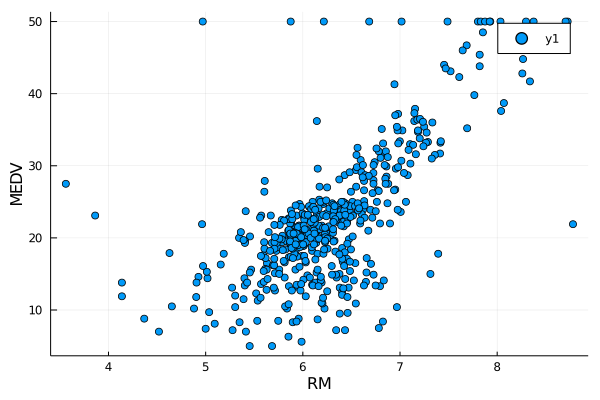

In [1]:
# 小レポート課題 設問1

# 最も大きな傾き(w_i)をもつ説明変数は何でしたか？またその理由を考察して述べてください。
# 解答例: 
# CHAS チャールズ川沿いかどうかの変数。
# チャールズ川沿いは他に比べて発展しておりが良く地価が高いから。

# プロットしてみて自分の目で確かめてください
# 例えばCRIMの場合をプロットしています。2ヶ所のCRIMを書き換えてください。

scatter(boston.RM, boston.MEDV, xlabel="RM", ylabel="MEDV")

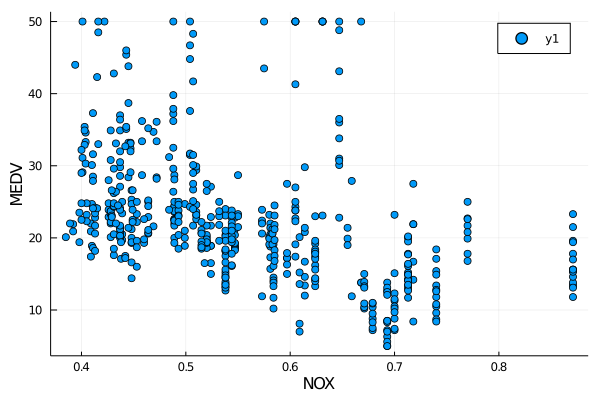

In [1]:
# 小レポート課題 設問2

# 最も小さな傾き(w_i)をもつ説明変数は何でしたか？またその理由を考察して述べてください。
# 解答例: 
# DIS 地域から5つの雇用施設までの重み付き距離。
# 雇用施設まで遠いことで、給与を得るチャンスが減るので、収入が少なくなるから

# プロットしてみて自分の目で確かめてください
# 例えばCRIMの場合をプロットしています。2ヶ所のCRIMを書き換えてください。

scatter(boston.NOX, boston.MEDV, xlabel="NOX", ylabel="MEDV")